## 작업공간 불러오기 및 패키지 설치

In [37]:
load("C:/Users/eunee/khu_project_2019/data_cleaning.RData")

In [38]:
install.packages("ggplot2")
library(ggplot2)

install.packages("gridExtra")
library(gridExtra)

install.packages("grid")
library(grid)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'gridExtra' is in use and will not be installed"Warning message:
"package 'grid' is not available (for R version 3.5.1)"Warning message:
"package 'grid' is a base package, and should not be updated"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

작업공간을 불러오고, 시각화를 위해 ```ggplot2``` 패키지를 설치한다.

In [39]:
summary(kor)

     SEX           AGE               MARITAL        INCOME       TRTWHY1
 female:308   Min.   :19.00   cohabit    :526   Min.   : 0.000   N:663  
 male  :377   1st Qu.:36.00   non-cohabit: 60   1st Qu.: 3.000   Y: 22  
              Median :44.00   single     : 99   Median : 5.000          
              Mean   :45.01                     Mean   : 5.999          
              3rd Qu.:52.00                     3rd Qu.: 7.000          
              Max.   :81.00                     Max.   :21.000          
 TRTWHY2 TRTWHY3 TRTWHY4
 N:478   N:630   N:604  
 Y:207   Y: 55   Y: 81  
                        
                        
                        
                        

In [40]:
summary(fin)

     SEX           AGE               MARITAL        INCOME       TRTWHY1
 female:280   Min.   :15.00   cohabit    :456   Min.   : 2.303   N:474  
 male  :245   1st Qu.:35.00   non-cohabit: 13   1st Qu.: 8.006   Y: 51  
              Median :48.00   single     : 56   Median : 8.412          
              Mean   :46.73                     Mean   : 8.386          
              3rd Qu.:60.00                     3rd Qu.: 8.700          
              Max.   :75.00                     Max.   :11.736          
 TRTWHY2 TRTWHY3 TRTWHY4
 N:487   N:485   N:447  
 Y: 38   Y: 40   Y: 78  
                        
                        
                        
                        

본격적인 분석에 앞서 변수들의 분포를 살펴본다.

## 임금

### 한국

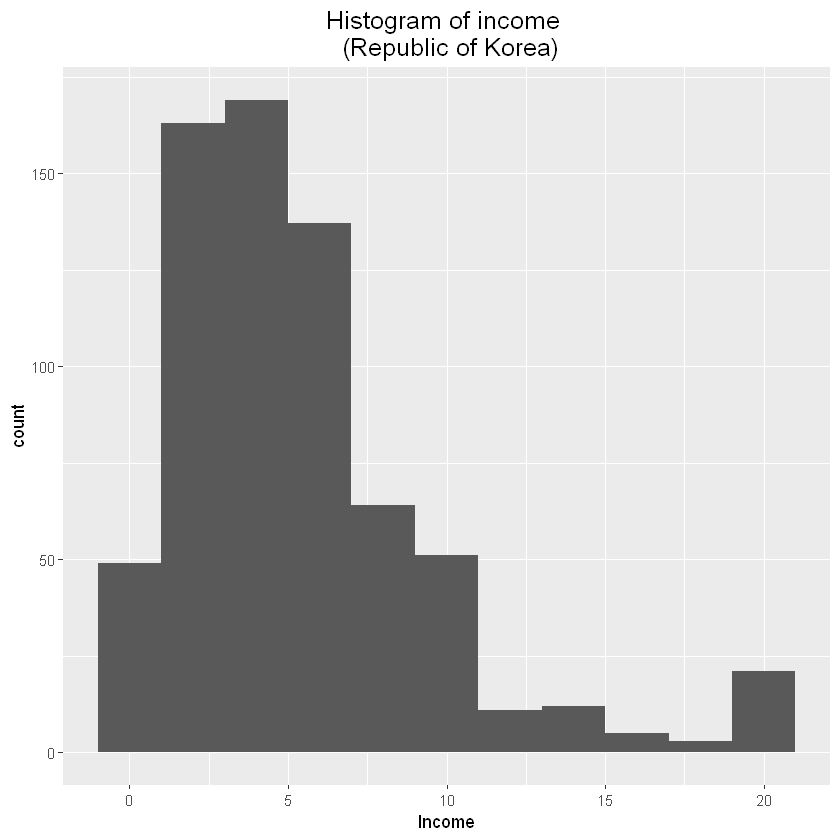

In [41]:
kor_income <- ggplot(kor, aes(x = INCOME)) + geom_histogram(binwidth = 2) + xlab("Income")
kor_income + ggtitle("Histogram of income \n (Republic of Korea)") + theme(plot.title = element_text(size = 15, hjust = 0.5))

한국의 임금은 <u>왼쪽으로 치우쳐진(Right skew)</u> 분포이다. 성별에 따른 임금의 분포를 살펴보면 다음과 같다.

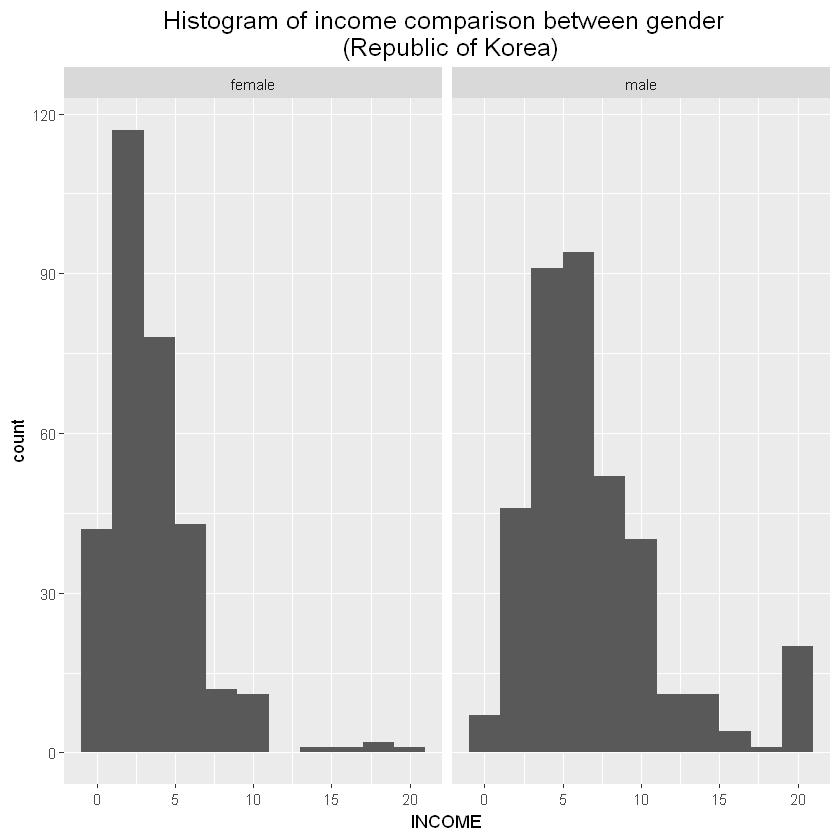

In [42]:
ggplot(kor, aes(x = INCOME)) +
    geom_histogram(position = "dodge", binwidth = 2) +
    facet_grid(.~SEX) +
    ggtitle("Histogram of income comparison between gender \n (Republic of Korea)") +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

<u>여성의 경우 저임금에 더</u> 치우쳤으며, <u>초고임금의 경우 남성이 차지하는 비중이 매우 높았다</u>.

### 핀란드

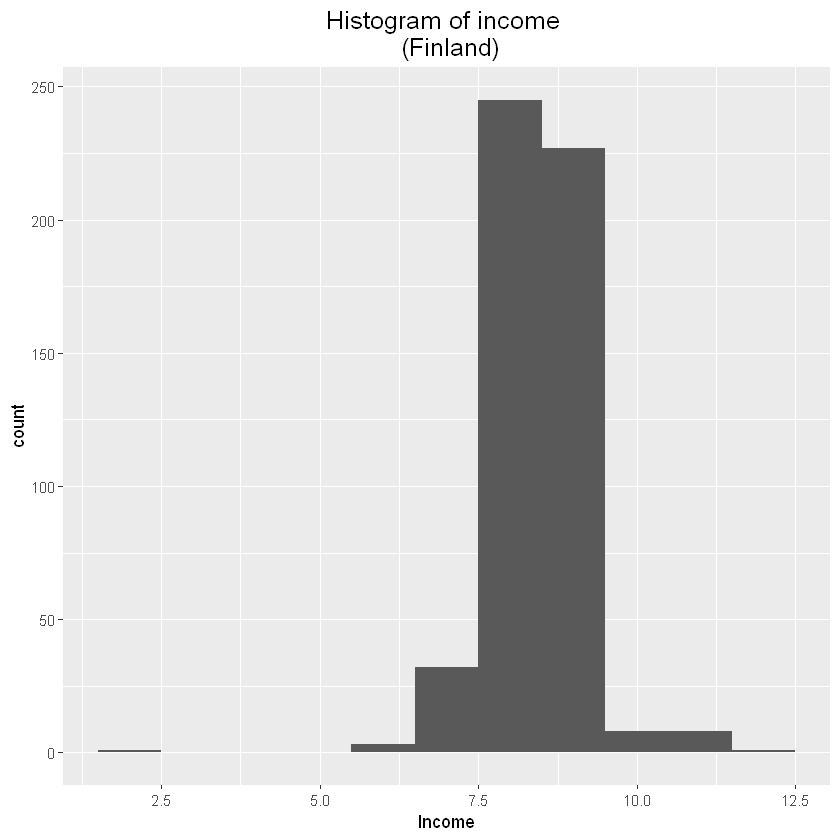

In [43]:
fin_income <- ggplot(fin, aes(x = INCOME)) + geom_histogram(binwidth = 1) + xlab("Income")
fin_income + ggtitle("Histogram of income \n (Finland)") + theme(plot.title = element_text(size = 15, hjust = 0.5))

핀란드의 임금 변수는 변수 클리닝 단계에서 로그를 취한 '로그 임금'이다.     
핀란드의 임금은 <u>오른쪽으로 치우친(left skew)</u> 분포이나, 치우침의 정도가 한국에 비해 덜하다.

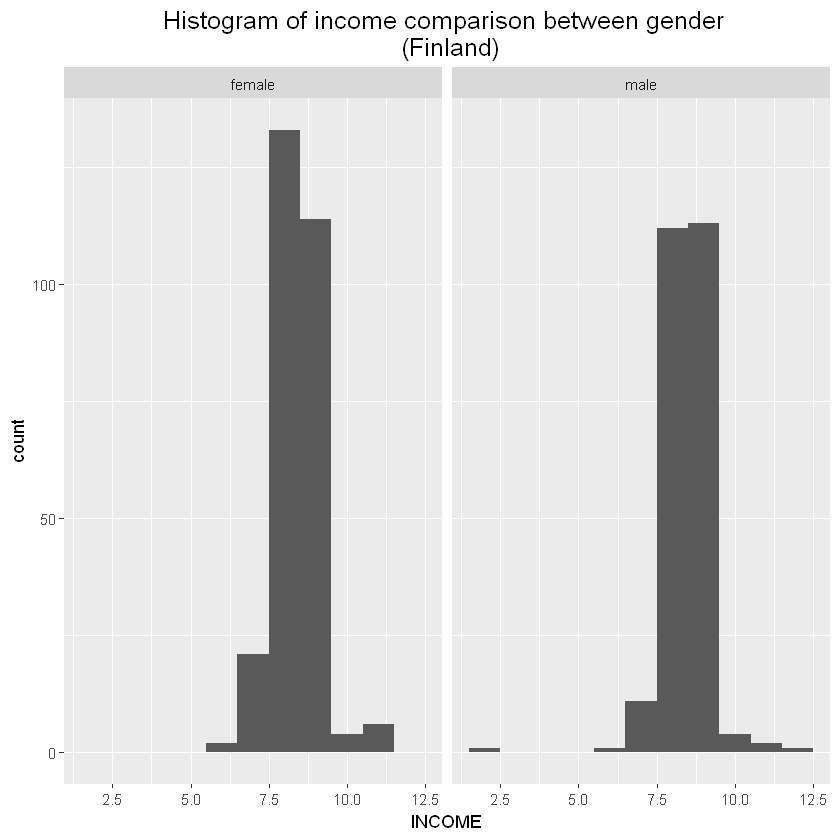

In [44]:
ggplot(fin, aes(x = INCOME)) +
    geom_histogram(position = "dodge", binwidth = 1) +
    facet_grid(.~SEX) +
    ggtitle("Histogram of income comparison between gender \n (Finland)") +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

<u>여성은 중위 임금에 몰려 분포</u>하는 경향이 있으며, <u>초저임금과 초고임금에 남성이 분포</u>한다.

### 한국과 핀란드 비교

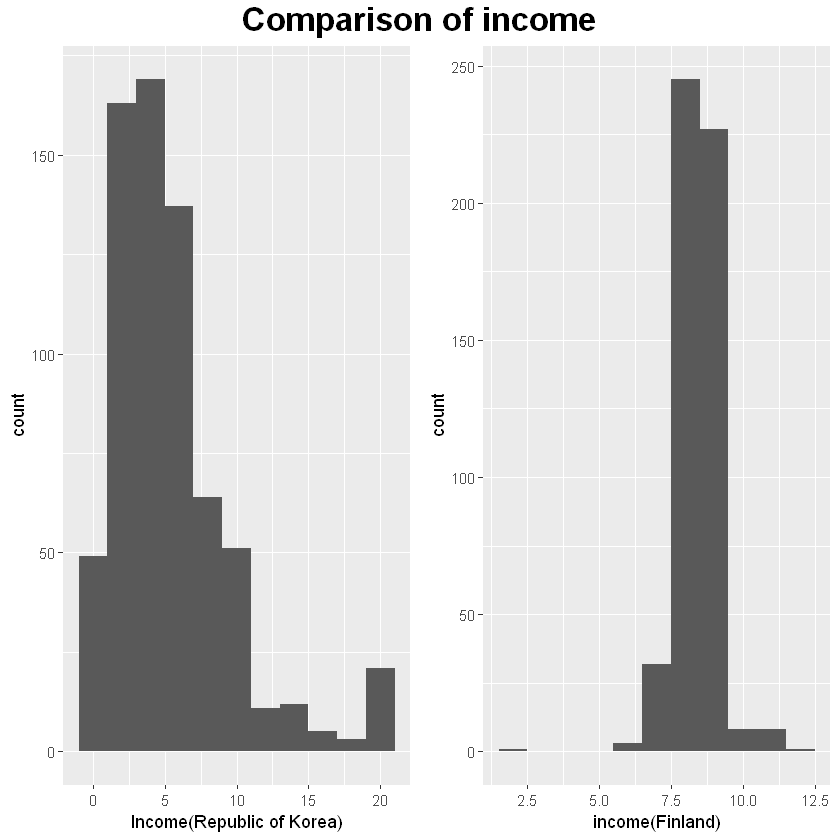

In [45]:
grid.arrange(kor_income + xlab("Income(Republic of Korea)"), fin_income + xlab("income(Finland)"), ncol = 2, 
             top = textGrob("Comparison of income", gp = gpar(fontsize = 20, font = 2)))

왼쪽이 한국, 오른쪽이 핀란드의 임금 분포이다.

## 치료 못 받았던 경험 : 비용을 지불할 능력이 없어서

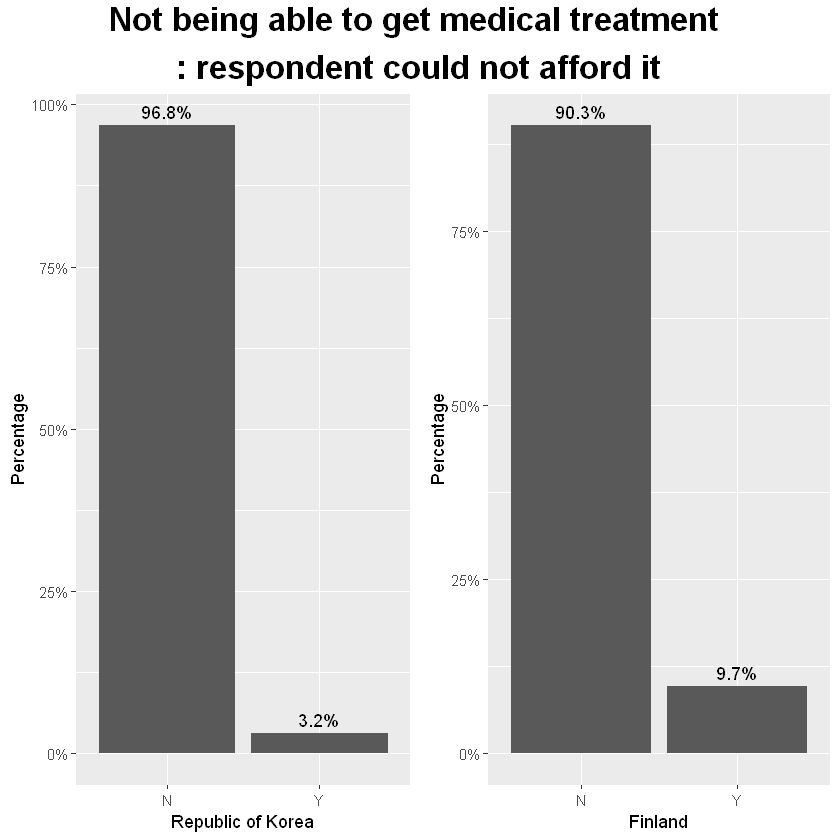

In [46]:
kor_trtwhy1 <- ggplot(kor, aes(x = TRTWHY1)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy1 <- ggplot(fin, aes(x = TRTWHY1)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy1, fin_trtwhy1, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: respondent could not afford it", gp = gpar(fontsize = 20, font = 2)))

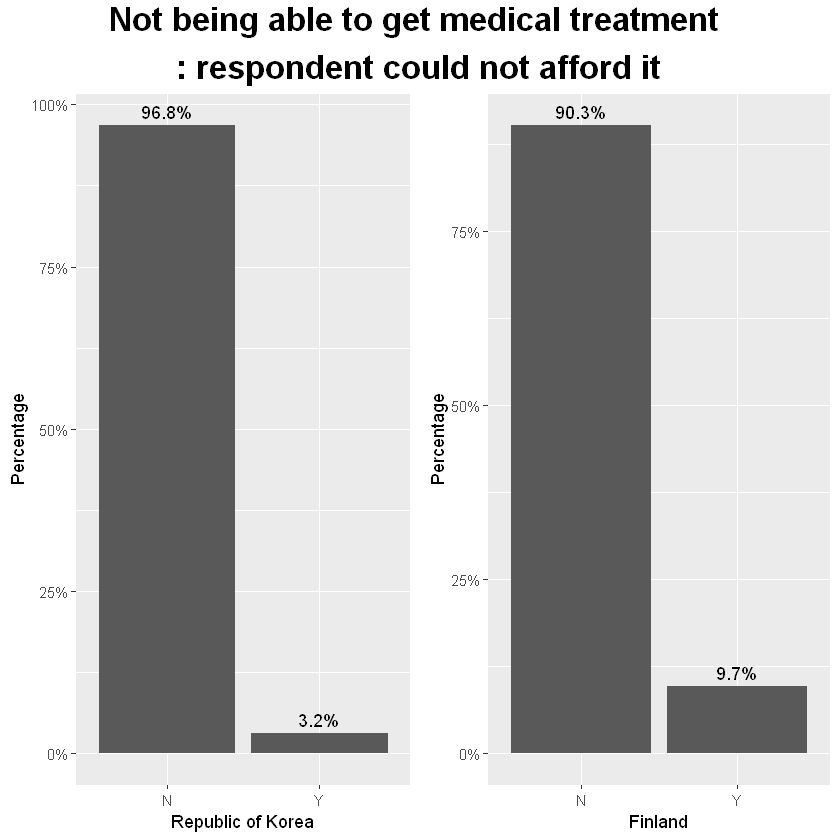

In [150]:
kor_trtwhy1 <- ggplot(kor, aes(x = TRTWHY1)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy1 <- ggplot(fin, aes(x = TRTWHY1)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy1, fin_trtwhy1, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: respondent could not afford it", gp = gpar(fontsize = 20, font = 2)))

## 치료 못 받았던 경험 : 직장을 빠지고 갈 시간이 없거나 다른 일로 바빠서 

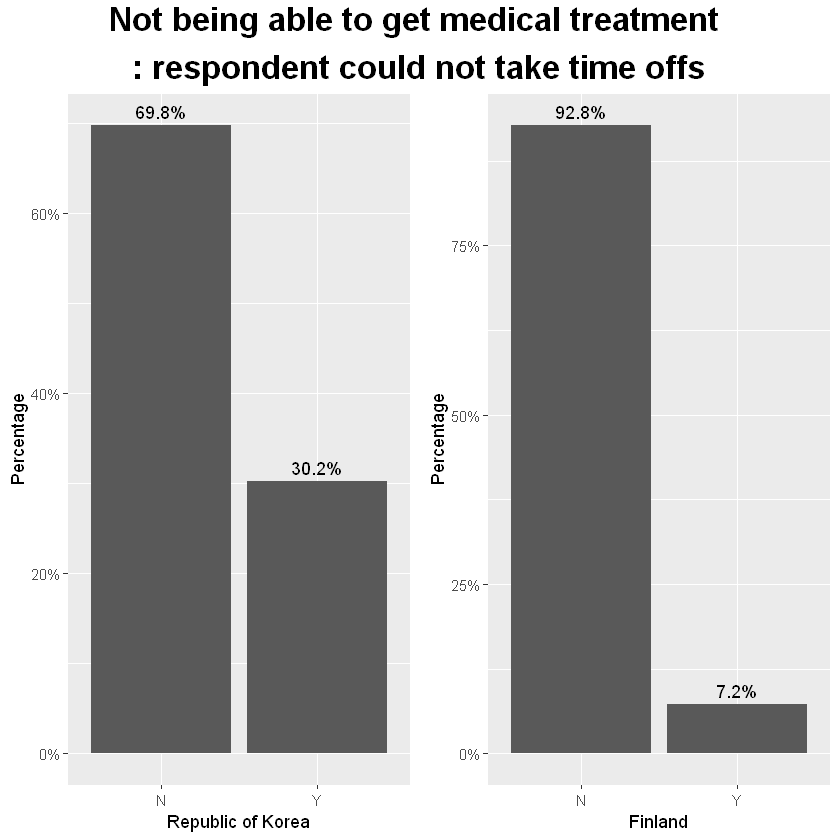

In [47]:
kor_trtwhy2 <- ggplot(kor, aes(x = TRTWHY2)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy2 <- ggplot(fin, aes(x = TRTWHY2)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy2, fin_trtwhy2, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: respondent could not take time offs", gp = gpar(fontsize = 20, font = 2)))

## 치료 못 받았던 경험 : 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서

### 한국

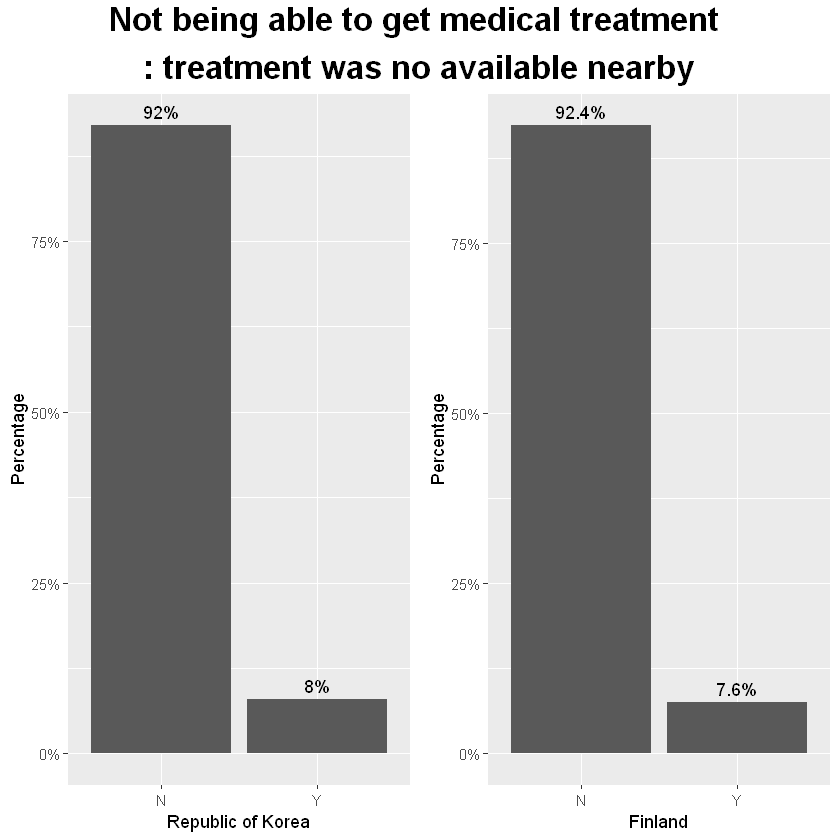

In [48]:
kor_trtwhy3 <- ggplot(kor, aes(x = TRTWHY3)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy3 <- ggplot(fin, aes(x = TRTWHY3)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy3, fin_trtwhy3, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: treatment was no available nearby", gp = gpar(fontsize = 20, font = 2)))

## 치료 못 받았던 경험 : 치료를 기다리는 사람들이 너무 많아서

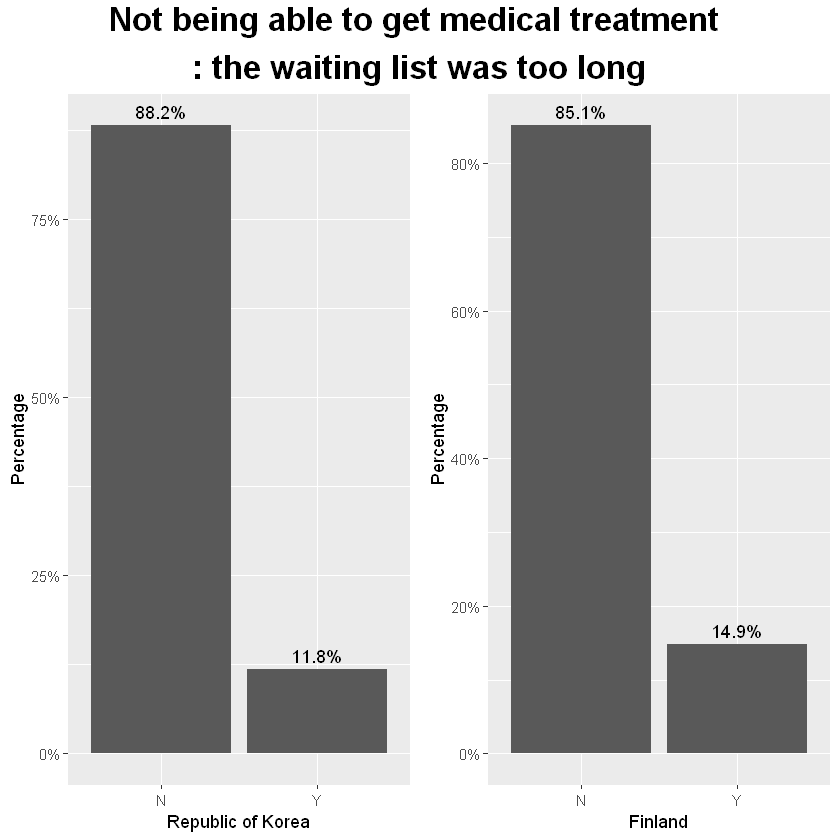

In [49]:
kor_trtwhy4 <- ggplot(kor, aes(x = TRTWHY4)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy4 <- ggplot(fin, aes(x = TRTWHY4)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy4, fin_trtwhy4, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: the waiting list was too long", gp = gpar(fontsize = 20, font = 2)))

종속 변수가 **이항변수**이기 때문에 최소제곱법을 사용한 회귀분석을 할 수 없다. 대신 로지스틱 회귀분석을 수행한다.

## 비용을 지불할 능력이 없어서 치료받지 못한 경험

### 한국

In [50]:
summary(glm(TRTWHY1 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY1 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.03982  -0.27600  -0.14785  -0.05845   3.06783  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.466316   1.159574  -1.265   0.2060    
SEXmale             1.158831   0.522982   2.216   0.0267 *  
MARITALnon-cohabit  0.948293   0.590232   1.607   0.1081    
MARITALsingle       0.600413   0.753966   0.796   0.4258    
AGE                -0.007149   0.019676  -0.363   0.7163    
INCOME             -0.666000   0.148117  -4.496 6.91e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.57  on 684  degrees of freedom
Residual deviance: 157.03  on 679  degrees of freedom
AIC: 169.03

Number of Fisher Scoring iterations: 8


<b>한국</b>의 경우 성별, 연령, 동거여부를 통제한다면 소득(```INCOME```)이 한 단위(50만원) 증가할 때 비용을 지불할 능력이 없어서 치료받지 못할(```TRTWHY1```) 승산이 exp(-0.666) = 0.5138 배, 즉 대략 절반으로 떨어진다. 다른 변수들의 영향력은 성별(```SEX```)이 유의수준 0.05 수준에서 유의미하며 다른 변수들의 영향력은 유의미하지 않다.

In [51]:
summary(glm(TRTWHY1 ~ MARITAL, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY1 ~ MARITAL, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4172  -0.2237  -0.2237  -0.2237   2.7204  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.6753     0.2808 -13.087   <2e-16 ***
MARITALnon-cohabit   1.2774     0.5450   2.344   0.0191 *  
MARITALsingle        0.5077     0.5826   0.872   0.3835    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.57  on 684  degrees of freedom
Residual deviance: 189.81  on 682  degrees of freedom
AIC: 195.81

Number of Fisher Scoring iterations: 6


동거 여부(```MARITAL```)에 따른 비용을 지불할 능력이 없어 치료받지 못할(```TRTWHY1```)의 로지스틱 회귀분석은 위와 같다. 동거하는 경우에 비해 동거하지 않는 경우 비용을 지불할 능력이 없어 치료받지 못할 승산이 exp(1.2774) = 3.587배이다(유의수준 0.05). 

In [52]:
summary(glm(TRTWHY1 ~ INCOME+MARITAL, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY1 ~ INCOME + MARITAL, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.79892  -0.27356  -0.16256  -0.07398   3.11587  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.6872     0.4002  -4.216 2.49e-05 ***
INCOME              -0.5266     0.1222  -4.309 1.64e-05 ***
MARITALnon-cohabit   0.7089     0.5613   1.263    0.207    
MARITALsingle        0.6500     0.6105   1.065    0.287    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.57  on 684  degrees of freedom
Residual deviance: 161.89  on 681  degrees of freedom
AIC: 169.89

Number of Fisher Scoring iterations: 8


그러나 동거의 효과는 소득(```INCOME```)을 통제하면 유의미하지 않게 된다.

### 핀란드

In [53]:
summary(glm(TRTWHY1 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = fin))


Call:
glm(formula = TRTWHY1 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = fin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8423  -0.4675  -0.3946  -0.3253   2.4682  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          6.824158   2.239101   3.048 0.002306 ** 
SEXmale             -0.216254   0.309707  -0.698 0.485019    
MARITALnon-cohabit -16.335497 967.993809  -0.017 0.986536    
MARITALsingle       -0.058326   0.478324  -0.122 0.902948    
AGE                 -0.011839   0.009822  -1.205 0.228069    
INCOME              -1.015646   0.266900  -3.805 0.000142 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.70  on 524  degrees of freedom
Residual deviance: 310.28  on 519  degrees of freedom
AIC: 322.28

Number of Fisher Scoring iterations: 16


<b>핀란드</b>의 경우 성별, 연령, 동거여부를 통제한다면 소득(```INCOME```)이 한 단위 증가할 때 비용을 지불할 능력이 없어서 치료받지 못할(```TRTWHY1```) 승산이 exp(-1.0156) = 0.3622배가 된다. 통제변수들은 유의미하지 않다.

## 직장을 빠지거나 다른 일로 바빠서 치료받지 못한 경험

### 한국

In [55]:
summary(glm(TRTWHY2 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY2 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1526  -0.8793  -0.7417   1.3506   2.1597  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)         0.804764   0.430857   1.868  0.06179 . 
SEXmale            -0.250057   0.188245  -1.328  0.18406   
MARITALnon-cohabit -0.492527   0.333573  -1.477  0.13980   
MARITALsingle      -0.417999   0.275355  -1.518  0.12900   
AGE                -0.022176   0.008266  -2.683  0.00730 **
INCOME             -0.073473   0.025482  -2.883  0.00393 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 839.41  on 684  degrees of freedom
Residual deviance: 814.92  on 679  degrees of freedom
AIC: 826.92

Number of Fisher Scoring iterations: 4


<b>한국</b>의 경우 성별, 동거여부, 연령을 통제하면 소득(```INCOME```)이 한 단위 증가할 때 직장을 빠지거나 다른 일로 바빠서 치료받지 못할(```TRTWHY2```) 승산이 exp(-0.0734) = 0.9292배가 되며, 통제변수로는 연령이 유의미하다. 

In [66]:
summary(glm(TRTWHY2 ~ SEX, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY2 ~ SEX, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9347  -0.9347  -0.7759   1.4413   1.6415  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6020     0.1192  -5.052 4.38e-07 ***
SEXmale      -0.4443     0.1673  -2.656  0.00791 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 839.41  on 684  degrees of freedom
Residual deviance: 832.34  on 683  degrees of freedom
AIC: 836.34

Number of Fisher Scoring iterations: 4


특이한 점은 여성은 남성에 비해 직장을 빠지거나 다른 일로 바빠서 치료받지 못할(```TRTWHY2```) 승산이 exp(-0.4443) = 1.5594배라는 것이다.

### 핀란드

In [57]:
summary(glm(TRTWHY2 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = fin))


Call:
glm(formula = TRTWHY2 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = fin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7240  -0.4123  -0.3723  -0.3206   2.4951  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -5.71396    2.12194  -2.693  0.00709 **
SEXmale            -0.09024    0.34152  -0.264  0.79160   
MARITALnon-cohabit  0.04464    1.08679   0.041  0.96724   
MARITALsingle       0.18253    0.55102   0.331  0.74045   
AGE                -0.01137    0.01221  -0.932  0.35158   
INCOME              0.43632    0.23203   1.880  0.06004 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 272.74  on 524  degrees of freedom
Residual deviance: 267.79  on 519  degrees of freedom
AIC: 279.79

Number of Fisher Scoring iterations: 5


반면 <b>핀란드</b>의 경우 성별, 동거여부, 연령을 통제하면 소득(```INCOME```)이 한 단위 증가할 때 직장을 빠지거나 다른 일로 바빠서 치료받지 못하는(```TRTWHY2```) 경험의 유의미한 관계가 유의수준 0.05 수준에서 존재하지 않는다.

In [67]:
summary(glm(TRTWHY2 ~ SEX, family = binomial(link = 'logit'), data = fin))


Call:
glm(formula = TRTWHY2 ~ SEX, family = binomial(link = "logit"), 
    data = fin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3949  -0.3949  -0.3792  -0.3792   2.3100  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.51231    0.22689 -11.073   <2e-16 ***
SEXmale     -0.08383    0.33866  -0.248    0.805    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 272.74  on 524  degrees of freedom
Residual deviance: 272.68  on 523  degrees of freedom
AIC: 276.68

Number of Fisher Scoring iterations: 5


<b>핀란드</b>는 한국과 달리 성별과 직장을 빠지거나 다른 일로 바빠서 치료받지 못하는(```TRTWHY2```) 경험의 유의미한 관계가 나타나지 않는다.

## 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서 치료받지 못한 경험

### 한국

In [68]:
summary(glm(TRTWHY3 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY3 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6810  -0.4763  -0.3733  -0.2560   2.5811  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -0.96913    0.72013  -1.346  0.17838   
SEXmale            -0.11220    0.32797  -0.342  0.73228   
MARITALnon-cohabit  0.23876    0.43318   0.551  0.58151   
MARITALsingle      -1.39952    0.65266  -2.144  0.03201 * 
AGE                -0.01075    0.01318  -0.816  0.41443   
INCOME             -0.16113    0.05659  -2.847  0.00441 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.89  on 684  degrees of freedom
Residual deviance: 361.94  on 679  degrees of freedom
AIC: 373.94

Number of Fisher Scoring iterations: 6


<b>한국</b>의 경우 성별, 동거여부, 연령을 통제했을 때 소득(```INCOME```)이 한 단위 증가할 때 거주하는 동네나 인근에서 필요한 치료를 받을 수 없어서 치료받지 못하는(```TRTWHY2```) 경험의 승산이 exp(-0.1611) = 0.8512배가 된다. 유의수준 0.05 수준에서 동거 여부가 통제변수로 유의미한데,

In [69]:
summary(glm(TRTWHY3 ~ MARITAL, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY3 ~ MARITAL, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-0.535  -0.418  -0.418  -0.418   2.644  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.3938     0.1575 -15.200   <2e-16 ***
MARITALnon-cohabit   0.5220     0.4111   1.270   0.2042    
MARITALsingle       -1.0720     0.6071  -1.766   0.0774 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.89  on 684  degrees of freedom
Residual deviance: 376.56  on 682  degrees of freedom
AIC: 382.56

Number of Fisher Scoring iterations: 6


동거여부 자체는 설명변수로서 유의미하지 않다.

### 핀란드

In [70]:
summary(glm(TRTWHY3 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = fin))


Call:
glm(formula = TRTWHY3 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = fin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8738  -0.4390  -0.3925  -0.3463   2.6965  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)  
(Intercept)         1.301e+00  2.068e+00   0.629   0.5293  
SEXmale             4.823e-02  3.323e-01   0.145   0.8846  
MARITALnon-cohabit -1.540e+01  1.069e+03  -0.014   0.9885  
MARITALsingle      -1.100e+00  8.123e-01  -1.354   0.1758  
AGE                 3.983e-03  1.122e-02   0.355   0.7226  
INCOME             -4.687e-01  2.377e-01  -1.972   0.0487 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 282.83  on 524  degrees of freedom
Residual deviance: 275.01  on 519  degrees of freedom
AIC: 287.01

Number of Fisher Scoring iterations: 16


<b>핀란드</b>의 경우 성별, 동거여부, 연령을 통제했을 때 소득(```INCOME```)이 한 단위 증가할 때 거주하는 동네나 인근에서 필요한 치료를 받을 수 없어서 치료받지 못하는(TRTWHY2) 경험의 승산이 exp(-0.4687) = 0.6258배가 된다.

## 치료를 기다리는 사람들이 너무 많아서 치료받지 못한 경험

### 한국

In [73]:
summary(glm(TRTWHY4 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY4 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6969  -0.5637  -0.4541  -0.3994   2.3362  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.87775    0.59464  -1.476   0.1399  
SEXmale            -0.56454    0.26915  -2.098   0.0359 *
MARITALnon-cohabit  0.19536    0.40780   0.479   0.6319  
MARITALsingle      -0.31106    0.38944  -0.799   0.4244  
AGE                -0.01620    0.01171  -1.383   0.1667  
INCOME             -0.01950    0.03425  -0.569   0.5693  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 497.89  on 684  degrees of freedom
Residual deviance: 488.18  on 679  degrees of freedom
AIC: 500.18

Number of Fisher Scoring iterations: 5


<b>한국</b>의 경우 성별, 동거여부, 연령을 통제했을 때 소득(```INCOME```)이 한 단위 증가할 때 치료를 기다리는 사람들이 너무 많아서 치료받지 못하는(```TRTWHY4```) 경험은 통계적으로 유의미하지 않다. 다만 성별이 통제변수로서 유의수준 0.05에서 유의미하게 등장한다.

In [74]:
summary(glm(TRTWHY4 ~ SEX, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY4 ~ SEX, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5821  -0.5821  -0.4280  -0.4280   2.2071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.6895     0.1571 -10.754  < 2e-16 ***
SEXmale      -0.6547     0.2406  -2.721  0.00651 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 497.89  on 684  degrees of freedom
Residual deviance: 490.33  on 683  degrees of freedom
AIC: 494.33

Number of Fisher Scoring iterations: 5


여성의 경우 치료를 기다리는 사람이 너무 많아서 치료받지 못하는(```TRTWHY4```) 경험의 승산이 남성의 exp(-0.6547) = 0.5169배이다.

### 핀란드

In [75]:
summary(glm(TRTWHY4 ~ SEX+MARITAL+AGE+INCOME, family = binomial(link = 'logit'), data = fin))


Call:
glm(formula = TRTWHY4 ~ SEX + MARITAL + AGE + INCOME, family = binomial(link = "logit"), 
    data = fin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1206  -0.5964  -0.5554  -0.4559   2.2754  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)  
(Intercept)          1.344393   1.583280   0.849   0.3958  
SEXmale              0.132780   0.247959   0.535   0.5923  
MARITALnon-cohabit -15.156402 653.208427  -0.023   0.9815  
MARITALsingle       -0.739313   0.488990  -1.512   0.1306  
AGE                 -0.009855   0.008490  -1.161   0.2457  
INCOME              -0.310647   0.181350  -1.713   0.0867 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 441.23  on 524  degrees of freedom
Residual deviance: 431.62  on 519  degrees of freedom
AIC: 443.62

Number of Fisher Scoring iterations: 15


반면, <b>핀란드</b>의 경우 소득은 유의수준 0.05에서 유의미한 설명변수의 역할을 하지 못한다.